In [1]:
# Regular Modules
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import datetime
import scipy.integrate as scint
from numpy.random import default_rng
import numpy.ma as ma
import matplotlib.tri as tri
import scipy.special as sc
import scipy.sparse as sps
import datetime

# My Modules
import src.helpers as helpers
import src.model_systems as model_systems
import src.diffusion_map as dmap

# Use timestamp for saving
time = datetime.datetime.now().strftime("%Y_%m%d_%H%M%S")
%matplotlib inline
plt.rcParams['figure.dpi'] = 75 # default is 75
plt.style.use('default')

### Load Full Molecular Dynamics Data for plotting
Trajectory has a *static* biased potential, computed from a well-tempered metadynamics run with biasing on a grid in $\phi,\psi$

In [2]:
# Set Gromacs Temperature
kb = 0.0083144621
T = 300
beta = 1.0 / (kb * T)

fname = 'systems/aladip/data/TRAJ_COLVAR_METAD_2VAR_GRID_STATIC'
colvar_data = np.loadtxt(fname)
fname = 'systems/aladip/data/diffusions_traj_static_4var.npz'
inData = np.load(fname)
diffusions = inData["diffusions"]
end = colvar_data.shape[0]
start = 0
step = 5   # Subsampling Rate

t_full = colvar_data[start:end,0]  # timestep
phi_full = colvar_data[start:end,1] # phi dihedral angle coordinates
psi_full = colvar_data[start:end,2] # psi dihedral angle coordinates
theta_full = colvar_data[start:end,3] # theta dihedral angle coordinates
xi_full = colvar_data[start:end,4] # xi dihedral angle coordinates
bias_full = colvar_data[start:end,5] 
rct_full = colvar_data[start:end,6] 
rbias_full = colvar_data[start:end,7] 

t = colvar_data[start:end:step,0]  # timestep
phi = colvar_data[start:end:step,1] # phi dihedral angle coordinates
psi = colvar_data[start:end:step,2] # psi dihedral angle coordinates
theta = colvar_data[start:end:step,3] # theta dihedral angle coordinates
xi = colvar_data[start:end:step,4] # xi dihedral angle coordinates
bias = colvar_data[start:end:step,5] 
rct = colvar_data[start:end:step,6] 
rbias = colvar_data[start:end:step,7] 

data = np.vstack([phi, psi, theta, xi])
data_full = np.vstack([phi_full, psi_full, theta_full, xi_full])
N = data.shape[1]
print(f"number of data points: {N}")
print(f"data shape: {data.shape}")

number of data points: 10001
data shape: (4, 10001)


(10001, 2, 2)


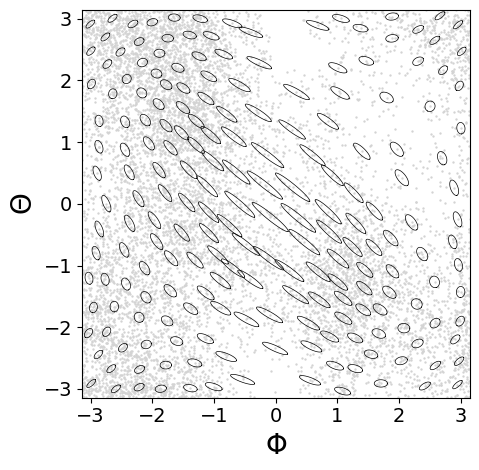

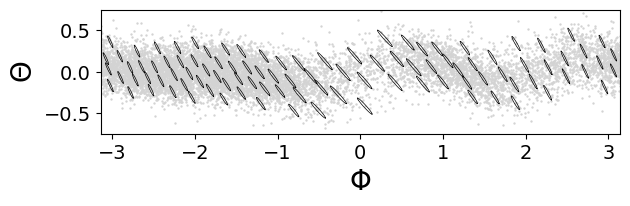

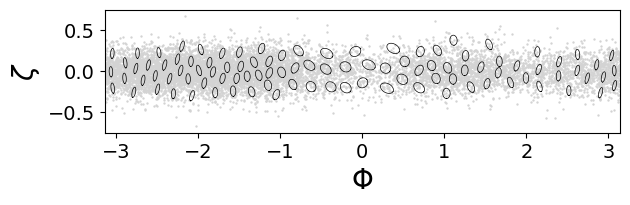

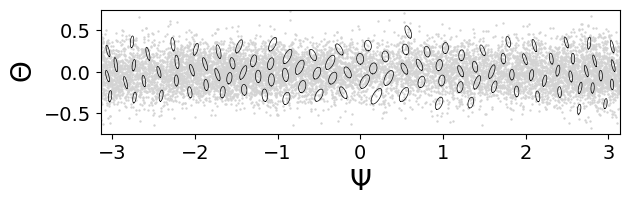

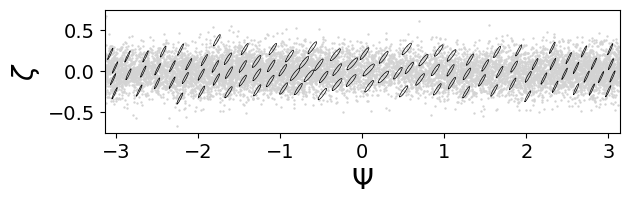

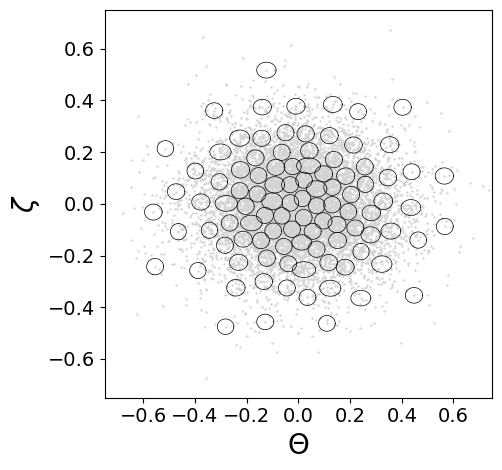

In [3]:
i = 0
j = 1

diffusions_phipsi = np.zeros((N, 2, 2))
diffusions_phipsi = diffusions
diffusions_phipsi = diffusions_phipsi[:, [i, j], :]
diffusions_phipsi = diffusions_phipsi[:, :, [i, j]]
xmin, xmax = -np.pi, np.pi
ymin, ymax = -np.pi, np.pi

plot_data = data[[i, j], :]
plot_diffusions = diffusions_phipsi

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

N = data.shape[1]
fig = plt.figure() 
plt.scatter(plot_data[0, :], plot_data[1, :], s=0.5, c='lightgray')
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(plot_data.T)
#plt.title("Alanine Dipeptide, Diffusion Coefficient Ellipses", size=12)
for i in range(n_clusters):
   idx = np.argmin(np.sum((plot_data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
   C = plot_diffusions[idx, :, :]
   helpers.plot_cov_ellipse(C, plot_data[:, idx], plot_scale=0.3)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
#plt.gca().set_aspect('equal')

i = 0
j = 2
names = "phitheta"

diffusions_phitheta = np.zeros((N, 2, 2))
diffusions_phitheta = diffusions
diffusions_phitheta = diffusions_phitheta[:, [i, j], :]
diffusions_phitheta = diffusions_phitheta[:, :, [i, j]]
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75

plot_data = data[[i, j], :]
plot_diffusions = diffusions_phitheta

import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

N = data.shape[1]
fig = plt.figure() 
plt.scatter(plot_data[0, :], plot_data[1, :], s=0.5, color='lightgray')
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(plot_data.T)
#plt.title("Alanine Dipeptide, Diffusion Coefficient Ellipses", size=12)
for i in range(n_clusters):
   idx = np.argmin(np.sum((plot_data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
   C = plot_diffusions[idx, :, :]
   helpers.plot_cov_ellipse(C, plot_data[:, idx], plot_scale=0.1)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

#################################################################################
i = 0
j = 3
names = "phizeta"

diffusions_phitheta = np.zeros((N, 2, 2))
diffusions_phitheta = diffusions
diffusions_phitheta = diffusions_phitheta[:, [i, j], :]
diffusions_phitheta = diffusions_phitheta[:, :, [i, j]]
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75

plot_data = data[[i, j], :]
plot_diffusions = diffusions_phitheta

import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

N = data.shape[1]
fig = plt.figure() 
plt.scatter(plot_data[0, :], plot_data[1, :], s=0.5, c='lightgray')
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\zeta$', size=20)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(plot_data.T)
#plt.title("Alanine Dipeptide, Diffusion Coefficient Ellipses", size=12)
for i in range(n_clusters):
   idx = np.argmin(np.sum((plot_data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
   C = plot_diffusions[idx, :, :]
   helpers.plot_cov_ellipse(C, plot_data[:, idx], plot_scale=0.1)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

#################################################################################
i = 1
j = 2
names = "psitheta"

diffusions_phitheta = np.zeros((N, 2, 2))
diffusions_phitheta = diffusions
diffusions_phitheta = diffusions_phitheta[:, [i, j], :]
diffusions_phitheta = diffusions_phitheta[:, :, [i, j]]
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75

plot_data = data[[i, j], :]
plot_diffusions = diffusions_phitheta

import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

N = data.shape[1]
fig = plt.figure() 
plt.scatter(plot_data[0, :], plot_data[1, :], s=0.5, color='lightgray')
plt.xlabel(r'$\Psi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(plot_data.T)
#plt.title("Alanine Dipeptide, Diffusion Coefficient Ellipses", size=12)
for i in range(n_clusters):
   idx = np.argmin(np.sum((plot_data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
   C = plot_diffusions[idx, :, :]
   helpers.plot_cov_ellipse(C, plot_data[:, idx], plot_scale=0.1)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

#################################################################################
i = 1
j = 3
names = "psizeta"

diffusions_phitheta = np.zeros((N, 2, 2))
print(diffusions_phitheta.shape)
diffusions_phitheta = diffusions
diffusions_phitheta = diffusions_phitheta[:, [i, j], :]
diffusions_phitheta = diffusions_phitheta[:, :, [i, j]]
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75

plot_data = data[[i, j], :]
plot_diffusions = diffusions_phitheta

import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

N = data.shape[1]
fig = plt.figure() 
plt.scatter(plot_data[0, :], plot_data[1, :], s=0.5, color='lightgray')
plt.xlabel(r'$\Psi$', size=20)
plt.ylabel(r'$\zeta$', size=20)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

from sklearn.cluster import KMeans
n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(plot_data.T)
#plt.title("Alanine Dipeptide, Diffusion Coefficient Ellipses", size=12)
for i in range(n_clusters):
   idx = np.argmin(np.sum((plot_data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
   C = plot_diffusions[idx, :, :]
   helpers.plot_cov_ellipse(C, plot_data[:, idx], plot_scale=0.1)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

#################################################################################
i = 2
j = 3
names = "thetazeta"

diffusions_phitheta = np.zeros((N, 2, 2))
diffusions_phitheta = diffusions
diffusions_phitheta = diffusions_phitheta[:, [i, j], :]
diffusions_phitheta = diffusions_phitheta[:, :, [i, j]]
xmin, xmax = -0.75, 0.75
ymin, ymax = -0.75, 0.75

plot_data = data[[i, j], :]
plot_diffusions = diffusions_phitheta

import matplotlib
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
N = data.shape[1]
fig = plt.figure() 
plt.scatter(plot_data[0, :], plot_data[1, :], s=0.5, color='lightgray')
#
#from matplotlib.ticker import StrMethodFormatter
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places

plt.xlabel(r'$\Theta$', size=20)
plt.ylabel(r'$\zeta$', size=20)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(plot_data.T)
#plt.title("Alanine Dipeptide, Diffusion Coefficient Ellipses", size=12)
for i in range(n_clusters):
   idx = np.argmin(np.sum((plot_data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
   C = plot_diffusions[idx, :, :]
   helpers.plot_cov_ellipse(C, plot_data[:, idx], plot_scale=0.05)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

### Approximate Target Measure
Using that the diffusion maps kernel density estimate (kde) satisfies $$kde \approx \exp(-\beta(F + V_{bias})), \text{(up to a constant)}$$
target measure is set to $\exp(-\beta F),$ approximated as $$ \exp(-\beta F)  \approx kde\exp(\beta V_{bias})$$

In [4]:
kde_eps = 0.01

pbc_dims = np.array([2*np.pi])

# Compute kernel matrix row-by-row and kde entry by entry
kde = np.zeros(N)
for i in range(N):
    diffs = data[:, i, np.newaxis] - data
    diffs = helpers.periodic_restrict(diffs, pbc_dims) 
    sqdists_row = np.sum(diffs**2, axis=0)
    kernel_sqdists_row = np.exp(-sqdists_row / (2*kde_eps))
    kde[i] = np.sum(kernel_sqdists_row)
d = data.shape[0]
kde *= (N)**(-1)*(2*np.pi*kde_eps)**(-d/2)

target_measure = kde*np.exp(beta*rbias)


### Define reactant and product set in 4 dihedral angles

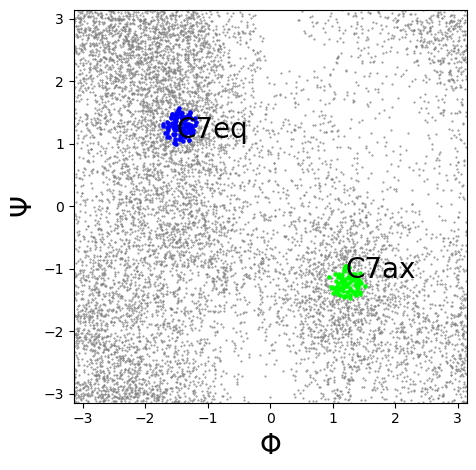

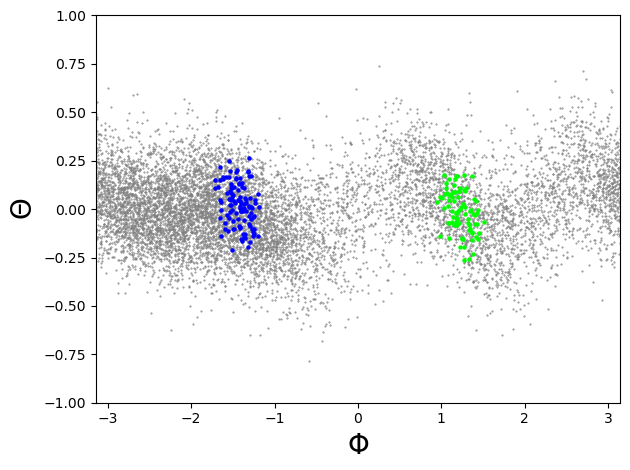

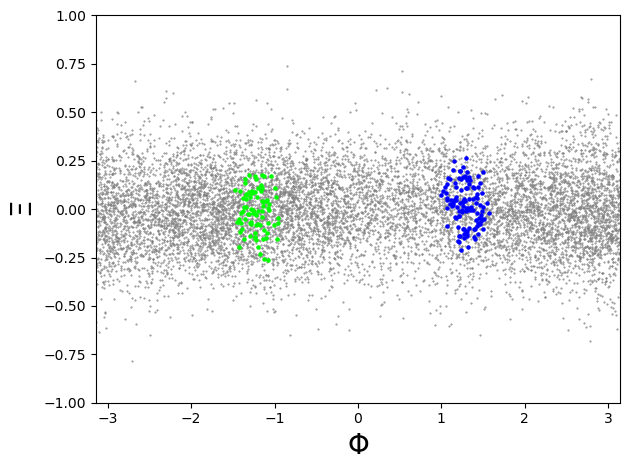

In [5]:
## Create boolean arrays defining A,B and rest of the domain (C)
A_bool = np.zeros(N, dtype=bool)
B_bool = np.zeros(N, dtype=bool)
a = np.array([-1.44338729, 1.282817, 0.02792527, -0.07504916])
b = np.array([1.23045712, -1.20602251, -0.01396263,  0.09948377])
asums = np.sqrt(np.sum((a.reshape([4, 1]) - data)**2, axis=0))
bsums = np.sqrt(np.sum((b.reshape([4, 1]) - data)**2, axis=0))

# Create boolean arrays defining A,B and rest of the domain (C)
A_bool = np.zeros(N, dtype=bool)
B_bool = np.zeros(N, dtype=bool)
for n in range(N):
    if asums[n] < 0.3:
        A_bool[n] = True
    if bsums[n] < 0.3:
        B_bool[n] = True
C_bool = ~np.logical_or(A_bool, B_bool)

A_plot = data[:, A_bool]
B_plot= data[:, B_bool]
C_plot = data[:, C_bool]

my_cmap = matplotlib.cm.get_cmap('brg')
A_color= my_cmap(0.0)
B_color = my_cmap(1.0)

fig = plt.figure() 
#plt.scatter(data[0, :], data[1, :], s=0.5, color='gray')
plt.scatter(C_plot[0, :], C_plot[1, :], s=0.2, color='gray')
plt.scatter(A_plot[0, :], A_plot[1, :], s=5, color=A_color)
plt.scatter(B_plot[0, :], B_plot[1, :], s=5, color=B_color)
plt.gca().text(-1.5, 1.1, 'C7eq', fontsize=20)
plt.gca().text(1.2, -1.15, 'C7ax', fontsize=20)

xmin, xmax = -np.pi, np.pi
ymin, ymax = -np.pi, np.pi
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Psi$', size=20)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

fig = plt.figure() 
plt.scatter(C_plot[0, :], C_plot[2, :], s=0.2, color='gray')
plt.scatter(A_plot[0, :], A_plot[2, :], s=5, color=A_color)
plt.scatter(B_plot[0, :], B_plot[2, :], s=5, color=B_color)

xmin, xmax = -np.pi, np.pi
ymin, ymax = -1, 1
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
plt.tight_layout()

fig = plt.figure() 
plt.scatter(C_plot[1, :], C_plot[2, :], s=0.2, color='gray')
plt.scatter(A_plot[1, :], A_plot[2, :], s=5, color=A_color)
plt.scatter(B_plot[1, :], B_plot[2, :], s=5, color=B_color)

xmin, xmax = -np.pi, np.pi
ymin, ymax = -1, 1
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Xi$', size=20)
plt.tight_layout()



## Diffusion Map

In [6]:
eps = 0.06
pbc_dims = np.array([2*np.pi])
radius = None
n_neigh = 512
density_mode = None
neigh_mode = "RNN"

# Compute target measure
method = "targetMMAP"
##### Compute some sort of diffusion map 
if method == 'MMAP' or method == 'targetMMAP':
    if method == 'MMAP':
        target_measure = None
    my_dmap = dmap.TargetMeasureMahalanobisDiffusionMap(epsilon=eps, diffusion_list=diffusions,
                                                       radius=radius, n_neigh=n_neigh, neigh_mode=neigh_mode,
                                                       target_measure=target_measure, 
                                                       remove_isolated=True, pbc_dims=pbc_dims)
if method == 'DMAP' or method =='targetDMAP':
    if method == 'DMAP':
        rho = None
        target_measure = None
    my_dmap = dmap.TargetMeasureDiffusionMap(epsilon=eps, radius=radius, n_neigh=n_neigh, 
                                             neigh_mode=neigh_mode,
                                             target_measure=target_measure, 
                                             remove_isolated=True, pbc_dims=None)
my_dmap.construct_generator(data)
q, subgraph  = my_dmap.construct_committor(B_bool, C_bool)
L = my_dmap.get_generator()

# with radius nearest neighbors, some data points may be discarded, so we take the non-isolated ones
nonisolated_bool = subgraph["nonisolated_bool"] 
data_nonisolated = data[:, nonisolated_bool]



Computing Mahalanobis distance matrix
Computing RNN kernel
Number of nodes left after removing isolated: 9999
Ratio of nonzeros to zeros in kernel matrix: 0.008102430405056708


### Compute Normalizing Constant For Diffusion Maps

In [7]:
############################################################
# Compute normalizing constant for diffusion maps
N = L.shape[0]

sqdists = my_dmap._compute_sqdists(data_nonisolated, metric=None)
sqdists = my_dmap._compute_nearest_neigh_graph(sqdists)
if sps.issparse(sqdists):
    K = sqdists.copy()
    K.data = np.exp(-K.data / (2*eps))
    # Check sparsity of kernel
    num_entries = K.shape[0]**2
    nonzeros_ratio = K.nnz / (num_entries)
    print(f"ratio of nonzeros: {nonzeros_ratio}")
    if nonzeros_ratio > 0.5:
        # Convert to dense matrix
        print("shifting to dense")
        #self.dense = True
        K = K.toarray()
else:
    K = np.exp(-sqdists / (2*eps))
K = K.minimum(K.T) # symmetrize kernel (in case of KNN)

kde = np.array(K.sum(axis=1)).ravel()
kde = kde*(1/N)*(2*np.pi*eps)**(-d/2)

target_measure_noniso = target_measure[nonisolated_bool]
Z_dmap = (1/N)*np.sum(target_measure_noniso / kde)
print(f"approximate Z via dmaps:{Z_dmap}")
############################################################



Computing RNN kernel
Number of nodes left after removing isolated: 9999
ratio of nonzeros: 0.07049466822869906
approximate Z via dmaps:2.2200129109967164


### Compute Rate

In [8]:

weight_Zdmap = target_measure_noniso/(kde*Z_dmap)
Q = q[np.newaxis, ...] - q[:, np.newaxis, ...]
rate = (1/beta)*(1/N)*np.sum(weight_Zdmap[:, np.newaxis]*(L.toarray())*(Q**2))
print(f"rate: {rate}")


rate: 2.1412017365959833e-06


### Compute committors averaged to a given pair of dihedrals

In [9]:
N_trunc = data_nonisolated.shape[1]
i = 0
j = 1

q_phi_psi = np.zeros_like(q)
i = 0
j = 1
val = 0.2
for n in range(len(q_phi_psi)):
    diff = data_nonisolated[[i, j], n].reshape(2,1) - data_nonisolated[[i, j], :]
    diff = helpers.periodic_restrict(diff, boundary=pbc_dims)
    my_dists = np.sqrt(np.sum(diff**2, axis=0))
    neigh_bool = my_dists < val
    q_phi_psi[n]  = np.mean(q[neigh_bool])

q_phi_theta = np.zeros_like(q)
i = 0
j = 2 
val = 0.2
for n in range(len(q_phi_theta)):
    diff = data_nonisolated[[i, j], n].reshape(2,1) - data_nonisolated[[i, j], :]
    diff = helpers.periodic_restrict(diff, boundary=pbc_dims)
    my_dists = np.sqrt(np.sum(diff**2, axis=0))
    neigh_bool = my_dists < val
    q_phi_theta[n]  = np.mean(q[neigh_bool])

### Plot Committors in $\Phi$ and $\Psi$, original and projected

Text(0.5, 1.0, '4 dihedral committor, averaged to $\\Phi, \\Psi$')

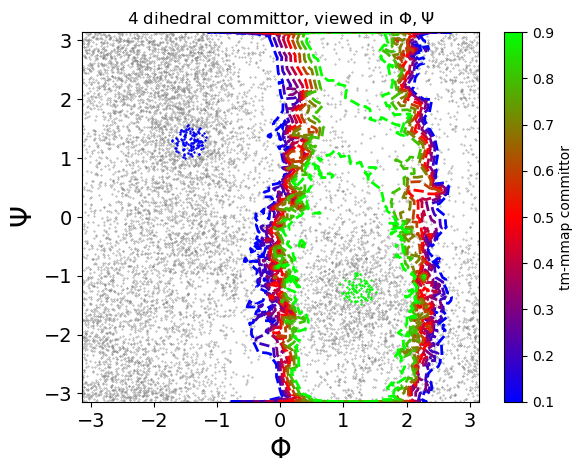

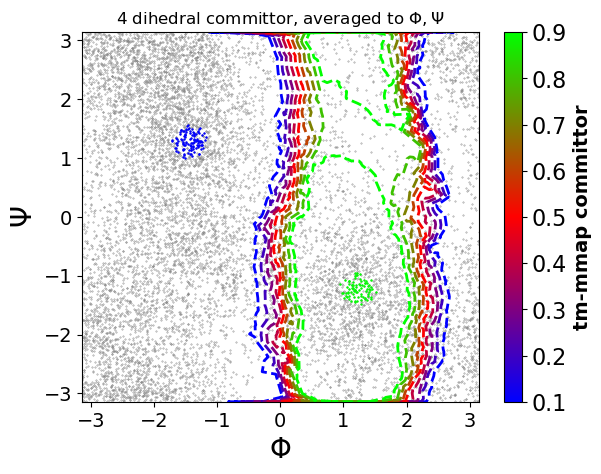

In [10]:
i = 0
j = 1 

contour_bool = np.ones(data_nonisolated.shape[1], dtype=bool)
triang = tri.Triangulation(data_nonisolated[i, :], data_nonisolated[j, : ])

cmap = 'brg'
fig = plt.figure()
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=0.1, color='gray')
my_levels = helpers.committor_contours() 
C1=plt.tricontour(triang, q, levels=my_levels, linewidths=2.0, cmap=cmap, linestyles='dashed')
norm= matplotlib.colors.Normalize(vmin=C1.cvalues.min(), vmax=C1.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = C1.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=C1.levels,label='tm-mmap committor')

plt.scatter(A_plot[i, :], A_plot[j, :], s=0.5, color=A_color)
plt.scatter(B_plot[i, :], B_plot[j, :], s=0.5, color=B_color)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Psi$', size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("4 dihedral committor, viewed in $\Phi, \Psi$")

fig = plt.figure()
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=0.1, color='gray')
my_levels = helpers.committor_contours() 
C1=plt.tricontour(triang, q_phi_psi, levels=my_levels, linewidths=2.0, cmap=cmap, linestyles='dashed')
plt.scatter(A_plot[i, :], A_plot[j, :], s=0.5, color=A_color)
plt.scatter(B_plot[i, :], B_plot[j, :], s=0.5, color=B_color)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Psi$', size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
norm= matplotlib.colors.Normalize(vmin=C1.cvalues.min(), vmax=C1.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = C1.cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=C1.levels, label='projected tm-mmap committor')
cbar.set_label(label='tm-mmap committor', size=14, weight='bold')
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.title("4 dihedral committor, averaged to $\Phi, \Psi$")




### Plot Committors in $\Phi$ and $\Psi$, original and projected

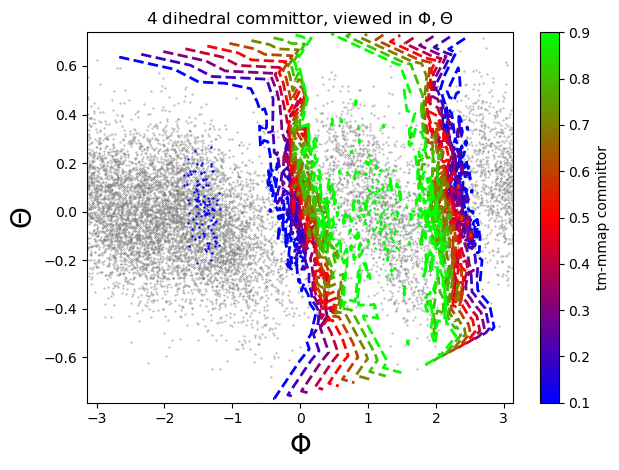

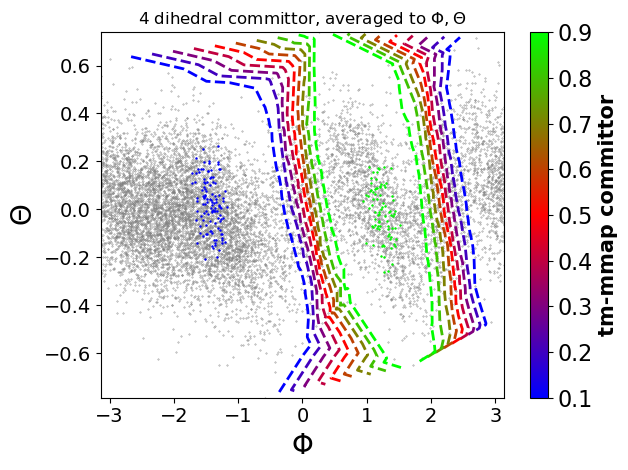

In [11]:
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75

i = 0
j = 2 

triang = tri.Triangulation(data_nonisolated[i, :], data_nonisolated[j, : ])
cmap='brg'
fig = plt.figure()
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=0.1, color='gray')
my_levels = helpers.committor_contours() 
C1=plt.tricontour(triang, q, levels=my_levels, linewidths=2.0, cmap=cmap, linestyles='dashed')
norm= matplotlib.colors.Normalize(vmin=C1.cvalues.min(), vmax=C1.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = C1.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=C1.levels, label='tm-mmap committor')

plt.scatter(A_plot[i, :], A_plot[j, :], s=0.5, color=A_color)
plt.scatter(B_plot[i, :], B_plot[j, :], s=0.5, color=B_color)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
plt.title("4 dihedral committor, viewed in $\Phi, \Theta$")
plt.tight_layout()

fig = plt.figure()
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=0.1, color='gray')
my_levels = helpers.committor_contours() 
C1=plt.tricontour(triang, q_phi_theta, levels=my_levels, linewidths=2.0, cmap=cmap, linestyles='dashed')
norm= matplotlib.colors.Normalize(vmin=C1.cvalues.min(), vmax=C1.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = C1.cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=C1.levels, label='projected tm-mmap committor')
cbar.set_label(label='tm-mmap committor', size=15, weight='bold')
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)

plt.scatter(A_plot[i, :], A_plot[j, :], s=0.5, color=A_color)
plt.scatter(B_plot[i, :], B_plot[j, :], s=0.5, color=B_color)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("4 dihedral committor, averaged to $\Phi, \Theta$")
plt.tight_layout()


### Compute reactive current in all 4 dihedrals

In [12]:
q_aux = q

if sps.issparse(L):
    L = L.toarray()
current_phi = (1/(Z_dmap*beta))*target_measure[nonisolated_bool]*helpers.duchamp(L, q_aux, data[0, nonisolated_bool], pbc_dims=np.array([2*np.pi]), PBC_ARG2=True)
current_psi = (1/(Z_dmap*beta))*target_measure[nonisolated_bool]*helpers.duchamp(L, q_aux, data[1, nonisolated_bool], pbc_dims=np.array([2*np.pi]), PBC_ARG2=True)
current_theta = (1/(Z_dmap*beta))*target_measure[nonisolated_bool]*helpers.duchamp(L, q_aux, data[2, nonisolated_bool], pbc_dims=np.array([2*np.pi]), PBC_ARG2=True)
current_xi = (1/(Z_dmap*beta))*target_measure[nonisolated_bool]*helpers.duchamp(L, q, data[3, nonisolated_bool], pbc_dims=np.array([2*np.pi]), PBC_ARG2=True)
current = np.vstack([current_phi, current_psi, current_theta, current_xi])



### Compute reactive current averaged to $\Phi, \Psi$ dihedrals

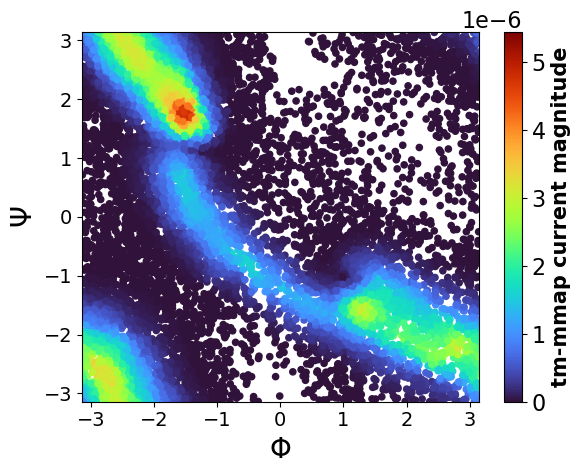

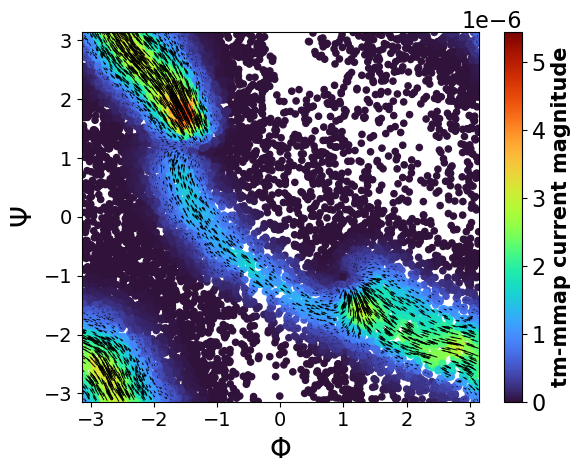

In [13]:
i = 0
j = 1 
current_aux = current[[i, j], :]
val = 0.2
for n in range(len(q_aux)):
    diff = data_nonisolated[[i, j], n].reshape(2,1) - data_nonisolated[[i, j], :]
    diff = helpers.periodic_restrict(diff, boundary=pbc_dims)
    my_dists = np.sqrt(np.sum(diff**2, axis=0))
    neigh_bool = my_dists < val
    current_aux[0, n]  = np.mean(current_aux[0, neigh_bool])
    current_aux[1, n]  = np.mean(current_aux[1, neigh_bool])
curr_mag = np.sqrt(np.sum(current_aux**2, axis=0))
cmap = 'turbo'

fig, ax = plt.subplots()
data_plot = data_nonisolated[:, :]
current_aux_plot = current_aux[:, :]
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=20.0, c=curr_mag, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(label='tm-mmap current magnitude', size=15, weight='bold')
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Psi$', size=20)
cbar.ax.yaxis.offsetText.set(size=16)
xmin, xmax = -np.pi, np.pi
ymin, ymax = -np.pi, np.pi
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig, ax = plt.subplots()
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=20.0, c=curr_mag, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(label='tm-mmap current magnitude', size=15, weight='bold')
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.quiver(data_plot[i, ::2], data_plot[j, ::2], current_aux_plot[0, ::2], current_aux_plot[1, ::2], angles='xy', scale_units='xy', scale=0.000015, minlength=0, headwidth=2)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Psi$', size=20)
xmin, xmax = -np.pi, np.pi
ymin, ymax = -np.pi, np.pi
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cbar.ax.yaxis.offsetText.set(size=16)


### Compute reactive current averaged to $\Phi, \Theta$ dihedrals

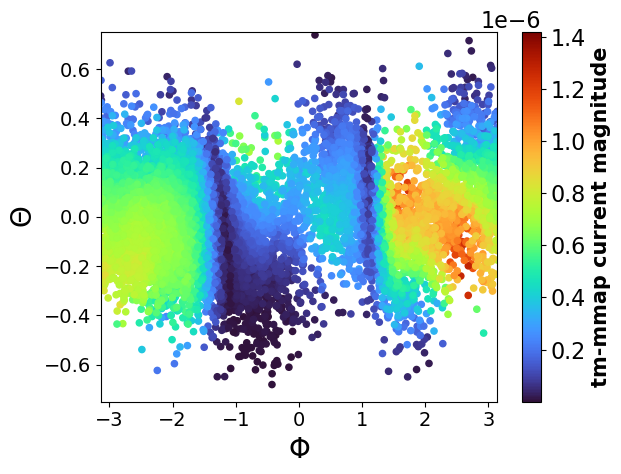

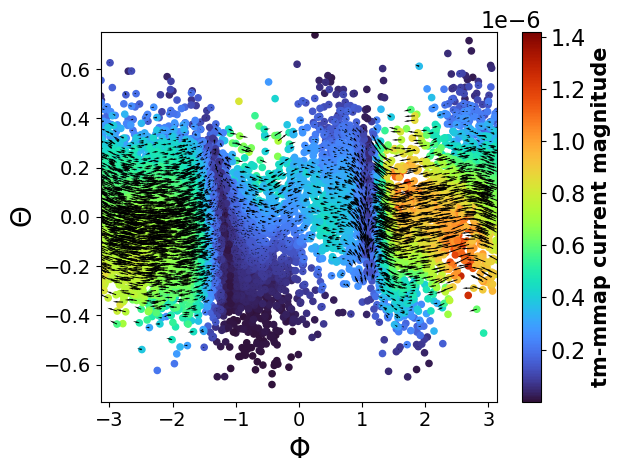

In [14]:
i = 0
j = 2 
current_aux = current[[i, j], :]
val = 0.2
for n in range(len(q_aux)):
    diff = data_nonisolated[[i, j], n].reshape(2,1) - data_nonisolated[[i, j], :]
    diff = helpers.periodic_restrict(diff, boundary=pbc_dims)
    my_dists = np.sqrt(np.sum(diff**2, axis=0))
    neigh_bool = my_dists < val
    current_aux[0, n]  = np.mean(current_aux[0, neigh_bool])
    current_aux[1, n]  = np.mean(current_aux[1, neigh_bool])
curr_mag = np.sqrt(np.sum(current_aux**2, axis=0))
cmap = 'turbo'

fig, ax = plt.subplots()
data_plot = data_nonisolated
current_aux_plot = current_aux
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=20.0, c=curr_mag[:], cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(label='tm-mmap current magnitude', size=15, weight='bold')
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
cbar.ax.yaxis.offsetText.set(size=16)
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig, ax = plt.subplots()
plt.scatter(data_nonisolated[i, :], data_nonisolated[j, :], s=20.0, c=curr_mag[:], cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(label='tm-mmap current magnitude', size=15, weight='bold')
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.quiver(data_plot[i, ::2], data_plot[j, ::2], current_aux_plot[0, ::2], current_aux_plot[1, ::2], angles='xy', scale_units='xy', scale=0.000005, minlength=0, headwidth=2)
xmin, xmax = -np.pi, np.pi
ymin, ymax = -0.75, 0.75
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\Phi$', size=20)
plt.ylabel(r'$\Theta$', size=20)
cbar.ax.yaxis.offsetText.set(size=16)
